# Logistic Regression
Logistic Regression is about training a model on some input data (e.g. Gender, Age, Salary) and a discrete output data (e.g. Purchased, which is 0 for No and 1 for Yes). Then using some test data to see how well it works.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split # scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [7]:
# Random seed of 0 means different scenario each run. Use any other number (e.g. 123) to always return the same training results
seed = 0

In [8]:
# From https://www.kaggle.com/datasets/rakeshrau/social-network-ads?resource=downloada
# It says that given a person (Gender, Age, Salary) will they purchase the product (1) or will they not (0)
# The first 5 rows of this text file look like this:
'''
User ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
...
'''

# So let's read it into a Panda's dataframe so we can play with it using Python
dataset = pd.read_csv('data/Social_Network_Ads.csv')

In [9]:
# Show the first few rows
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
# Convert the Gender column from {'Male', 'Female'} into {0, 1}
dataset['Gender'] = dataset['Gender'].map(dict(zip(['Male','Female'],[0,1])))
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [11]:
# Define which columns will be the imput
X = dataset[['Gender', 'Age', 'EstimatedSalary']]

# Define which columns will be the output
Y = dataset[['Purchased']]

In [12]:
# Split the dataset into 75% random columns for testing and the remaining 25% for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [13]:
print(f"""
Number of rows in each partition:
  x_train = {len(x_train)} people
  x_test  = {len(x_test)} people
  y_train = {len(y_train)} people where {len(y_train[y_train['Purchased'] == 1])} purchased the product
  y_test  = {len(y_test)} people where {len(y_test[y_test['Purchased'] == 1])} purchased the product
""")


Number of rows in each partition:
  x_train = 300 people
  x_test  = 100 people
  y_train = 300 people where 111 purchased the product
  y_test  = 100 people where 32 purchased the product



In [14]:
# Scale the data so that the range of one column in the input does not over-shadow another column of a different range.
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Show first 5 rows
x_train[:5]

# Notice that x_train is no longer a dataframe but an array of arrays; e.g. an array of 300 rows, where each row is an 
# array of 3 numbers to represent the scaled 'Gender', 'Age', 'EstimatedSalary' columns.

array([[ 0.98019606,  0.58164944, -0.88670699],
       [-1.02020406, -0.60673761,  1.46173768],
       [ 0.98019606, -0.01254409, -0.5677824 ],
       [ 0.98019606, -0.60673761,  1.89663484],
       [ 0.98019606,  1.37390747, -1.40858358]])

In [15]:
# The training functions work on arrays; not dataframes, so we need to convert t_train to an array
# So get the values of the 0th column of y_train
y_train = y_train.iloc[:, 0].values # Strange syntax eh? Read about slicing and iloc.
y_train

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], d

In [16]:
classifier = LogisticRegression(random_state=seed)
classifier.fit(x_train, y_train)
# Now we have a trained model.

LogisticRegression(random_state=0)

In [17]:
# Let's see how well it predicts the y_test values from the x_test data.
# The model was not trained on these "test" sets.
y_pred = classifier.predict(x_test)

In [18]:
# Calculate the confusion matrix; see https://en.wikipedia.org/wiki/Confusion_matrix
# Unlike the wiki page, the results here are defined in https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# and look like this:
# [[TN, FP],
#  [TP, FN]]
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 5, 27]], dtype=int64)

In [19]:
# Print the confusion matrix in a human readable form
# NOTE: Purchased is a discrete set of two elements {0, 1} and the first value in that set is 0, so that's what we're trying to predict.
# The confusion matrix is confusing because you want to interpret "Positive" with "Purchased", but it really means "Not Purchased"
# You will see this confusion in many scientific papers so just beware and do the translation in your head.

TN = cm[0][0]
TP = cm[0][1]
FP = cm[1][0]
FN = cm[1][1]

# Sensitivity or Recall or Total Positive Rate (TPR) of a clinical test refers to the ability of the test to correctly identify 
# those patients with the disease. A test with 100% sensitivity correctly identifies all patients with the disease. 
# A test with 80% sensitivity detects 80% of patients with the disease (true positives) but 20% with the disease go undetected (false negatives). 
# Out of all the positive classes, how much we predicted correctly. It should be high as possible.
Sensitivity = TP/(TP+FN)

# Out of all the positive classes we have predicted correctly, how many are actually positive.
Precision = TP/(TP+FP)

# The specificity of a clinical test refers to the ability of the test to correctly identify those patients without the disease. 
# Therefore, a test with 100% specificity correctly identifies all patients without the disease. A test with 80% specificity correctly 
# reports 80% of patients without the disease as test negative (true negatives) but 20% patients without the disease are incorrectly 
# identified as test positive (false positives).
Specificity = TN/(TN+FP)

# False Positive Rate
FPR = 1 - Specificity

FMeasure = 2*Sensitivity*Precision/(Sensitivity+Precision)

# Predictive Value for a Positive Result
# If the test is positive, what is the probability that the patient actually has the disease.
PVPos = TP/(TP+FP)

# Predictive Value for a Negative Result
# If the test is negative, what is the probability that the patient actually does not have the disease.
PVNeg = TN/(TN+FN)
      
LikelihoodRatio = Sensitivity/(1 - Specificity)

# ROC (Receiver Operating Characteristics) curve is plotted with TPR (x-axis) against the FPR (y-axis).
# AUC (Area Under the Curve) represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. AUC = 1.0 is perfect. AUC = 0.5 is worst case. AUC < 0.5 is reciprocating the results.


print(f"""
TN = {TN}
TP = {TP}
FP = {FP}
FN = {FN}

Sensitivity     = {Sensitivity}
Precision       = {Precision}
Specificity     = {Specificity}
FMeasure        = {FMeasure}
FPR             = {FPR}
PV+             = {PVPos}
PV-             = {PVNeg}
LikelihoodRatio = {LikelihoodRatio}


                           Predicted Positive (PP)            Predicted Negative (PN)
                           --------------------------         --------------------------
Actual Positive (P):       True  Positive (TP): {TP:>3}            False Negative (FN): {FN:>3}
Actual Negative (N):       False Positive (FP): {FP:>3}            True  Negative (TN): {TN:>3}

in other words:

                           Predicted Not Purchased (PP)       Predicted Purchased (PN)
                           --------------------------         --------------------------
Actual Not Purchased (P):  True  Positive (TP): {TP:>3}            False Negative (FN): {FN:>3}
Actual Purchased (N):      False Positive (FP): {FP:>3}            True  Negative (TN): {TN:>3}

If you add up 64 + 4 + 5 + 27, you get the 100 test rows that we tried to predict whether the customer purchased the product or not.
68 people in the test set (Purchased == 0) DID NOT make a purchase but 32 (Purchased == 1) did.
Don't confuse positive and negative with purchased or not. "Positive" means we correctly predicted the first value in our output set, which is 0.
Most confusion matrices are 2 X 2, but we can get 2 X N if we have N output categories; e.g. Bird, Cat, Dog, ...

True Positive of 64 means we correctly predicted the first value (0);  that someone did not make a purchase.
True Negative of 27 means we correctly predicted the second value (1); that someone did make a purchase.
False Negative of 4 means we falsely   predicted the first value (0);  that someone did make a purchase when in fact they did not.
False Positive of 5 means we falsely   predicted the second value (1); that someone did not make a purchase when in fact they did.
""")


TN = 64
TP = 4
FP = 5
FN = 27

Sensitivity     = 0.12903225806451613
Precision       = 0.4444444444444444
Specificity     = 0.927536231884058
FMeasure        = 0.19999999999999998
FPR             = 0.07246376811594202
PV+             = 0.4444444444444444
PV-             = 0.7032967032967034
LikelihoodRatio = 1.780645161290323


                           Predicted Positive (PP)            Predicted Negative (PN)
                           --------------------------         --------------------------
Actual Positive (P):       True  Positive (TP):   4            False Negative (FN):  27
Actual Negative (N):       False Positive (FP):   5            True  Negative (TN):  64

in other words:

                           Predicted Not Purchased (PP)       Predicted Purchased (PN)
                           --------------------------         --------------------------
Actual Not Purchased (P):  True  Positive (TP):   4            False Negative (FN):  27
Actual Purchased (N):      False Pos

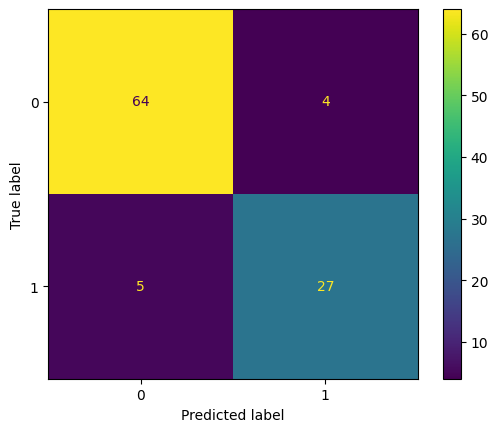

In [23]:
# Plot Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay(cm).plot()

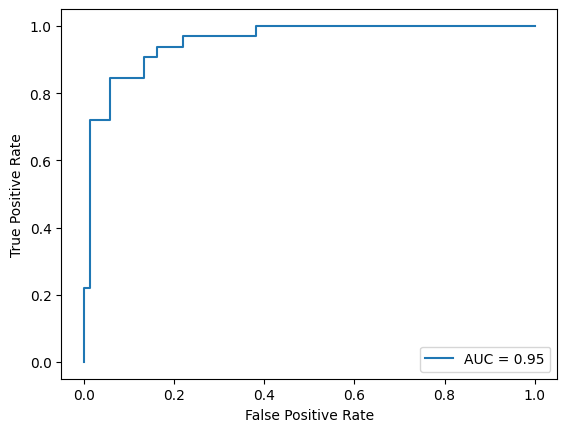

In [45]:
# Plot Receiver Operating Characteristics (ROC) curve
from sklearn.metrics import RocCurveDisplay, roc_curve

y_score = classifier.decision_function(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=classifier.classes_[1])
roc_auc = metrics.auc(fpr, tpr)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.show()

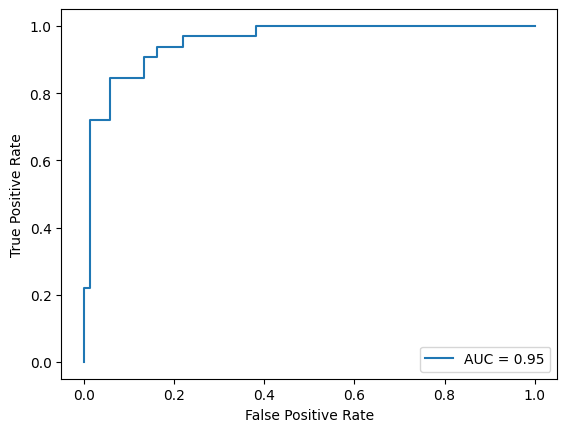

In [44]:
# Plot Receiver Operating Characteristics (ROC) curve
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn import metrics

y_score = classifier.decision_function(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=classifier.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.show()

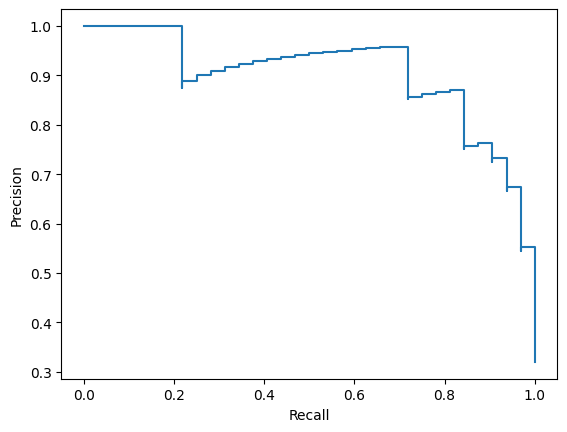

In [34]:
# Precision Recall Curve
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=classifier.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.show()